<div class="alert alert-block alert-info">
Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

# Introduction to Supervised Machine Learning: Classification
This notebook provides an overview of machine learning classification problems.

# Table of Contents
[Python Libraries in this Notebook](#Python-Libraries-in-this-Notebook)

[Supervised Learning: Classification](#Supervised-Learning:-Classification)

[Classification with Logistic Regression](#Classification-with-Logistic-Regression)

- [Logistic Function](#Logistic-Function)

[Classification Example](#Classification-Example)

- [Classification Example: Data](#Classification-Example:-Data)

- [Classification Example: Using Logistic Regression](#Classification-Example:-Using-Logistic-Regression)

- [Training/Testing Data Split](#Training/Testing-Data-Split)

- [Fit Training Data to Model](#Fit-Training-Data-to-Model)

- [Classification Model Performance Metrics](#Classification-Model-Performance-Metrics)

    - [Confusion Matrix](#Confusion-Matrix)

    - [F1 Score](#F1-Score)

    - [ROC Curve](#ROC-Curve)

    - [Cross Validation](#Cross-Validation)

- [Calculation of Performance Metrics of a Logistic Regression Classification](#Calculation-of-Performance-Metrics-of-a-Logistic-Regression-Classification)

- [Classification: Using Multiple Features](#Classification:-Using-Multiple-Features)

    - [Multiple Logistic Regression](#Multiple-Logistic-Regression)

    - [Multiple Logistic Regression: Prediction Function](#Multiple-Logistic-Regression:-Prediction-Function)

    - [Other Machine Learning Algorithms](#Other-Machine-Learning-Algorithms)

        - [Perceptron](#Perceptron)
        
        - [SGD Classifier](#SGD-Classifier)

        - [SVM](#SVM)

        - [Random Forest](#Random-Forest)
        
        - [k-Nearest Neighbors](#k-Nearest-Neighbors)
        
        - [Artificial Neural Network](#Artificial-Neural-Network)
        
            - [Artificial Neural Network (One Layer)](#Artificial-Neural-Network-(One-Layer))

            - [Artificial Neural Network (Three Layers)](#Artificial-Neural-Network-(Three-Layers))

# Python Libraries in this Notebook
[Return to Table of Contents](#Table-of-Contents)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
import seaborn as sns

# sklearn
# Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import r2_score, mean_absolute_error, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Other Classification Models
from sklearn import svm
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf

# TensorFlow
# Install TensorFlow: Uncomment and run once.
#!pip install tensorflow 
#!pip install tensorflow-gpu
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dense, Activation, Dropout, Normalization

# Supervised Learning: Classification
[Return to Table of Contents](#Table-of-Contents)

The classification problems the goal is to predict a categorical. 

When developing and evaluating a model in supervised ML (e.g., classification) includes the following steps:
- Defining values of the independent variable or variables (x)
- Defining values of the dependent variable or variable to be predicted (y)
- Scaling/normalization if needed
- Train/Test Split (Typically 80/20)
- Fitting the training data to the model
- Calculate predictions using the testing data.
- The data may sometimes be divided into training, testing and validation.
- Calculating model performance metrics
    - For classification model common metrics are confusion matrix, sensitivity, specificity, precision, recall, f-measure, true-positive rate, false-positvie rate, null-accuracy, etc.)
    - The testing data may be used for parameter optimization and then the validation data for calculating final performance metrics.-  
- Deploy and use the model for predicting. 


# Classification with Logistic Regression
[Return to Table of Contents](#Table-of-Contents)

Logistic Regression is one of the simplest algorithsm/models used for ML methods for predictive analytics and modeling, where the dependent variable is finite or categorical, for example:
- either A or B (binary regression) or 
- a range of finite options A, B, C or D (multinomial regression) <br>

<b> Application Examples </b>
- Email classification (SPAM/HAM)
- (Medicine) To predict the likelihood of disease or illness for a given population, which means that preventative care can be put in place. 
- (Businesses) To uncover patterns that lead to higher employee retention or create more profitable products by analyzing buyer behavior. 
- (Banking) Loan default prediction. Credit risk assessment.
- (Sports Betting) Sport result prediction, e.g. team-A wins, team-B wins, draw

### Logistic Function
[Return to Table of Contents](#Table-of-Contents)

In its basic form, logistic regression uses a logistic function to model a binary dependent variable. <br>
Consider a model with one predictor, $X$ and one binary (Bernoulli) response variable $Y$, which we denote $p=P(Y=1)$. We assume a linear relationship between the predictor variable and the log-odds (also called logit) of the event that $Y=1$. This linear relationship can be written in the following mathematical form (where $\ell$ is the log-odds, $\beta _{i}$ are parameters of the model):

$$ \ell = \log \bigg( \dfrac{{p}} {1 - p} \bigg) = \beta_{0} + \beta_{1}X  $$

<br>
We can recover the "odds" by exponentiating the log-odds 
$$ p = \dfrac{e^{\beta_{0} + \beta_{1}X}} {1 + e^{\beta_{0} + \beta_{1}X} } $$


The above formula shows that once $\beta _{i}$ are fixed, we can easily compute either the log-odds that $Y=1$ for a given observation, or the probability that $Y=1$ for a given observation. <br>
The main use-case of a logistic model is to be given an observation $X$ and estimate the probability $p$ that $Y=1$.


<br>
Note that the above can be changed for multiple logisitic regression for the linear compination of independent variables $\beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + \dotso + \beta_{k}X_{k } $ <br>

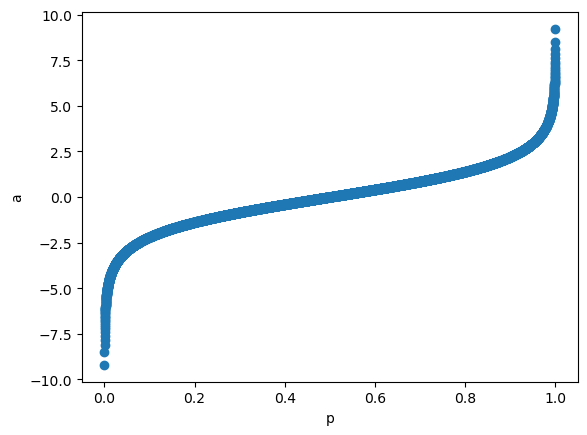

In [2]:
# let's look at these tell and p functions
p_x = np.arange(0.0001,0.999999999,0.0001)
r_y = [np.log(i/(1-i)) for i in p_x]
plt.scatter(p_x,r_y)
plt.xlabel('p');
plt.ylabel('a');

You can see that this function goes to to -inf and inf as we get close to 0 and 1, respectively. <br>
<br>
Visualizing the inverse logit:
$$ logit^{-1}(a) = \dfrac{e^{a} } {1 + e^{a}}  $$
where $a = \beta_{0} + \beta_{1}X$

Text(0, 0.5, 'p')

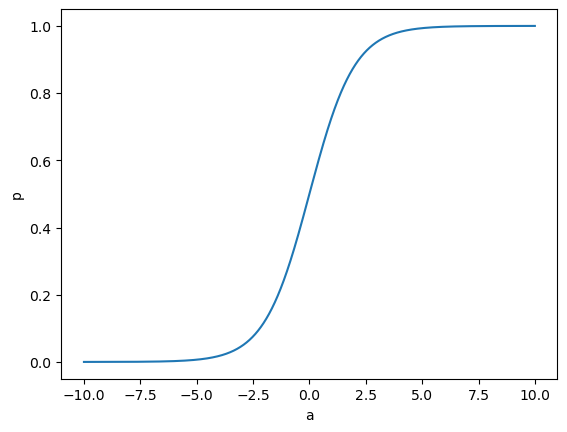

In [3]:
# We can rearrange and invert the axes.
x = np.arange(-10,10,0.001)
y = [np.exp(i)/(1+np.exp(i)) for i in x]
plt.plot(x,y)
plt.xlabel('a')
plt.ylabel('p')

# Classification Example
[Return to Table of Contents](#Table-of-Contents)


## Data
* Lets say we are an individual applying for a loan in an Icelandic bank and want to know the probability of our creditscore getting us a loan at the bank. 
* We have our individual credit scores and their categorical binary value.
* Data for each applicant:
  * x-axis: Icelandic credit score points ranging 100(bad credit score) to 400(excellent)
  * y-axis: Approved as 1 or 0

In [4]:
# Read the data in the link.
df = pd.read_csv("./input_data/loans.csv")
df.tail()

,accepted,creditscore,amount,age,marital,health_ins,creditgrade
14995,1,101,990461,37,1,1,E
14996,1,139,10543269,52,1,1,E
14997,1,185,9827416,77,1,1,E
14998,1,235,2279692,35,0,1,E
14999,1,192,2814084,22,1,1,E


In [5]:
df.describe()

,accepted,creditscore,amount,age,marital,health_ins
count,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,0.518600,287.329133,3.346065e+07,58.807333,0.490200,0.444467
std,0.499671,74.096185,2.887226e+07,20.860748,0.499921,0.496923
min,0.000000,100.000000,5.005890e+05,18.000000,0.000000,0.000000
25%,0.000000,246.000000,8.865364e+06,42.000000,0.000000,0.000000
50%,1.000000,299.000000,2.314822e+07,62.000000,0.000000,0.000000
75%,1.000000,345.000000,5.608367e+07,76.000000,1.000000,1.000000
max,1.000000,400.000000,9.999737e+07,90.000000,1.000000,1.000000


In [6]:
print(df.accepted.value_counts())
# Note that the dataset is pretty balanced almost 50/50.
# There may be cases that the data is imbalanced and you will have to address such deficiency.
# There are various methods for addressing data imbalance.

accepted
1    7779
0    7221
Name: count, dtype: int64


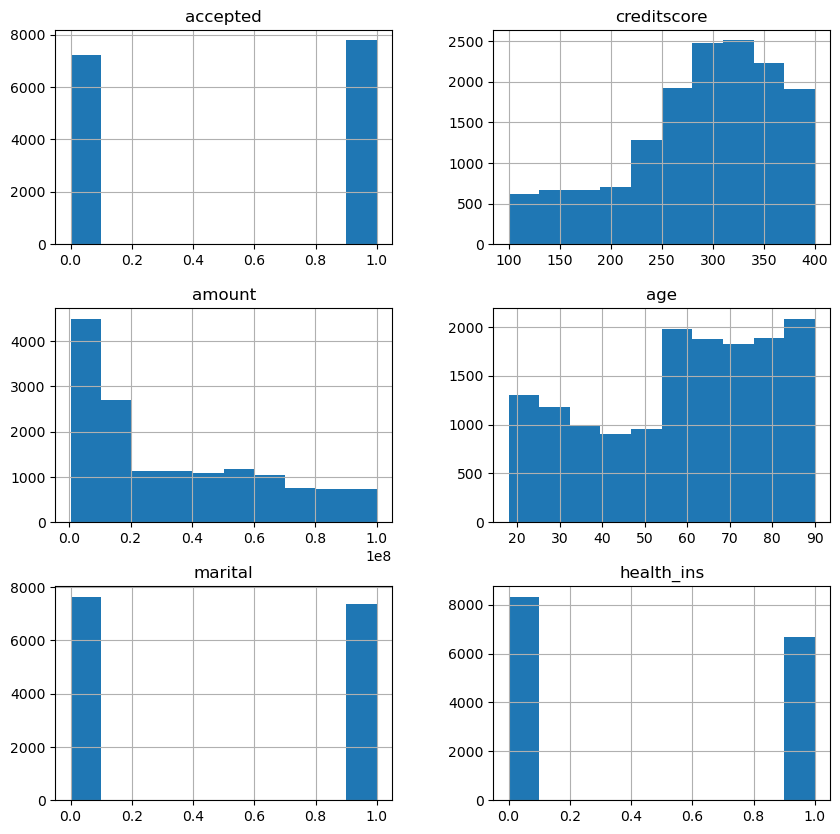

In [7]:
df.hist(layout=(3,2), figsize=(10,10))
plt.show()

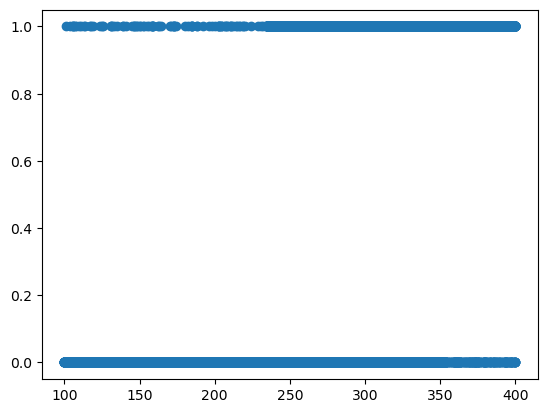

In [8]:
# We can plot the Accept vs Creditscore values.
x = df.creditscore.values
y = df.accepted.values

plt.scatter(x,y);

The figure above is a little bit misleading and scary!!
Let's plot creditscore histograms for approved and non-approved separately.

CPU times: total: 2.53 s
Wall time: 2.69 s


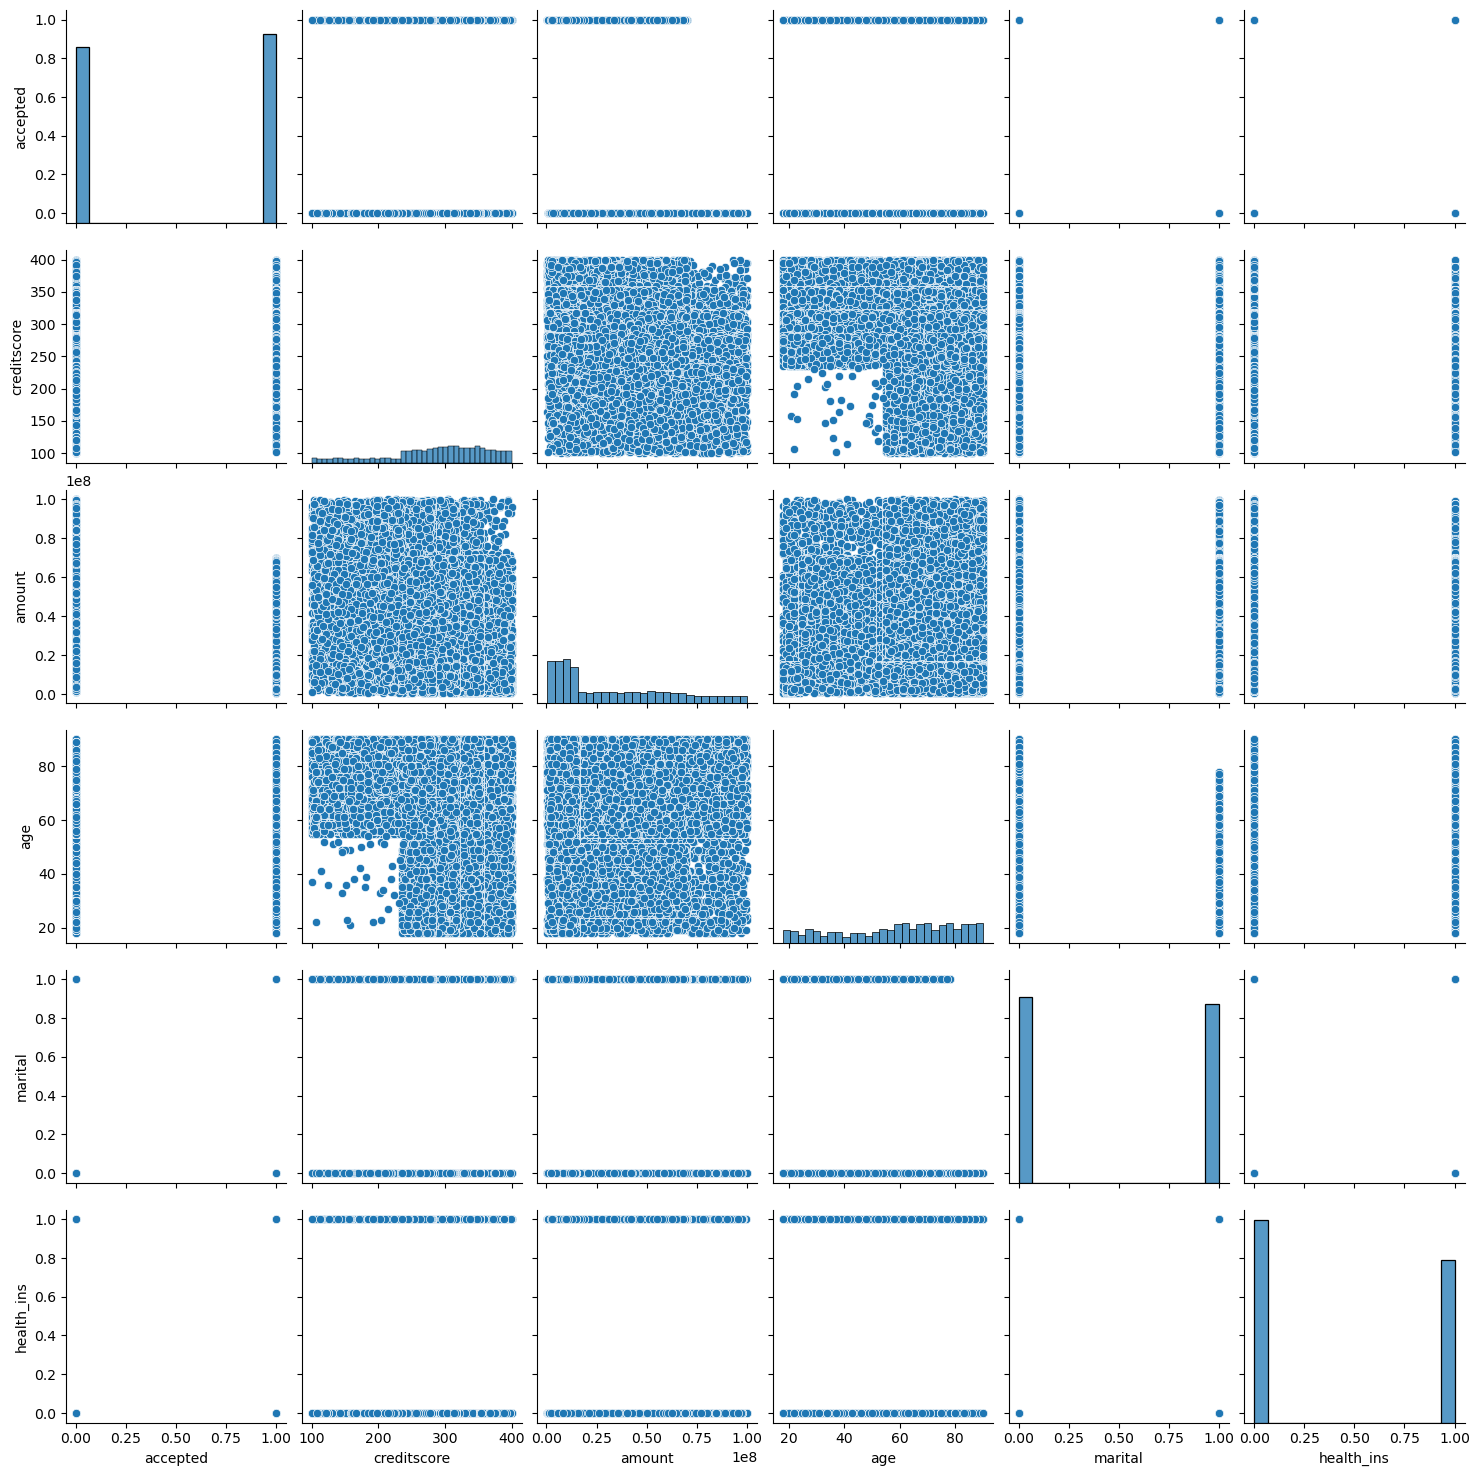

In [9]:
%%time
# The sns.pairplot() plots the relationship between any-two features. See documentation for other useful parameters.
# This can be used also for selecting which features may provide useful clusters or may be correlated.
# Note that if there are too many numerical features may be difficult to visualize. 
#sns.pairplot(df.sample(n = 500)); # Initially is better to start with a sample of the dataframe.
sns.pairplot(df); # Runs but may take a long time depending on the data.

## Using Logistic Regression

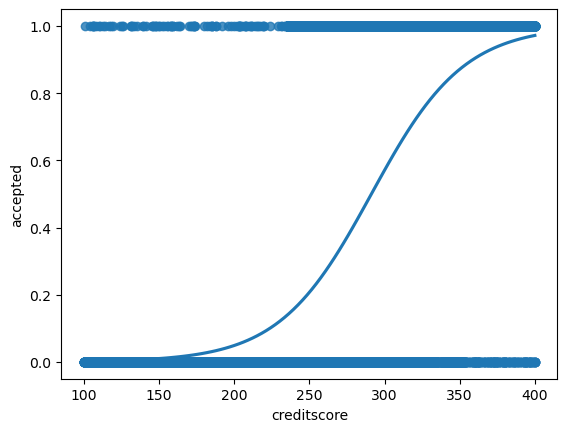

In [10]:
# Plot of the data with a logistic regression.
x = df['creditscore']
y = df['accepted']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)
plt.show();
# In the logistic regression when the values of credit score  an accepted of 0.5 an have
# In this case the creditscore is not the only feature that can be used to determine loan acceptance.

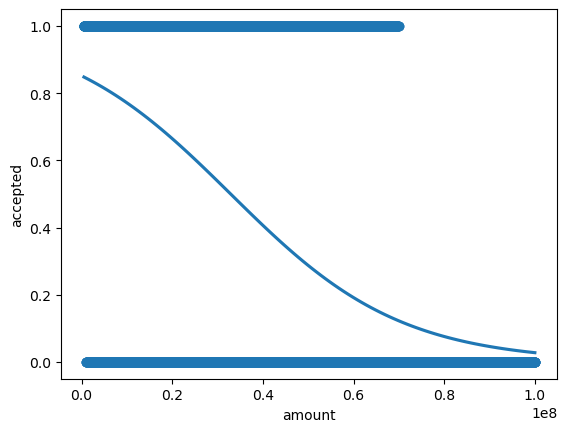

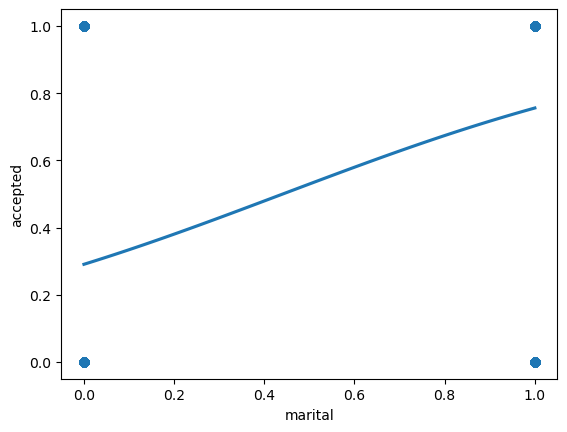

In [11]:
# We can also explore how the data looks with other features.
x = df['amount']
y = df['accepted']
# As expected the lower the amount the larger the probability of getting accepted.

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)
plt.show();

x = df['marital']
y = df['accepted']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)
plt.show();

# It is unfeasable in many cases to go feature by feature.
# In this case logic will tell us that credit score may be one of the leading features in determining acceptance.
# Let's continue to explore.

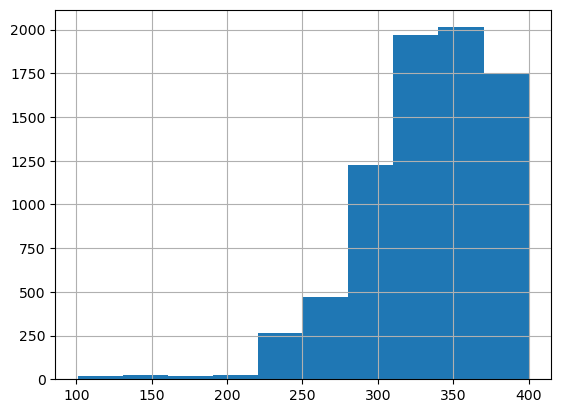

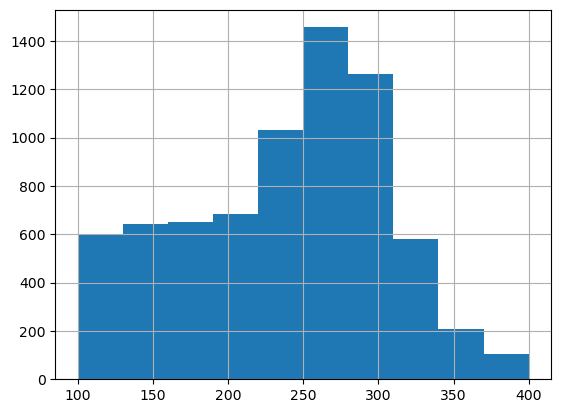

In [12]:
df.loc[df.accepted==1,'creditscore'].hist()
plt.show()
df.loc[df.accepted==0,'creditscore'].hist()
plt.show()
# This figures make a little more sense.

It loooks like credit score ~300 is the boundary for most approvals/denials.

In [13]:
# Let's only use creditscore to predict accepted.
df = df.loc[:,('accepted','creditscore')]

# Lets define our independent and dependent variables, x and y.
x = df.creditscore.values
y = df.accepted.values

## Training/Testing Data Split
[Return to Table of Contents](#Table-of-Contents)

During this step we tell the model that 80% of the data will be used to train or teach the model. 20% of the data will be used for testing purposes and calculating performance metrics.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# As previously mentioned we could aslo do a manual test/train split but using the function is better practice.

In [15]:
# Note that the outputs of train_test_split is an array.
X_train

array([265, 292, 302, ..., 317, 334, 287], dtype=int64)

In [16]:
X_train.reshape(-1,1)
# Input to the fit function requires the form as follows.

array([[265],
       [292],
       [302],
       ...,
       [317],
       [334],
       [287]], dtype=int64)

In [17]:
X_train.shape

(12000,)

## Fit Training Data to Model
[Return to Table of Contents](#Table-of-Contents)

In [18]:
logreg = LogisticRegression() # Define the model.
logreg.fit(X_train.reshape(-1,1), y_train) # Fit the data to the model

LogisticRegression()

In [19]:
y_predict = logreg.predict(X_test.reshape(-1,1)) # Calculate predicted values on the test data.
y_predict

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [20]:
logreg.score(X_test.reshape(-1,1) , y_test) # Calculate the mean accuracy score of the test data.
# This accuracy score means that 80% of the prediction matched the test data labeling.

0.8066666666666666

## Classification Model Performance Metrics
[Return to Table of Contents](#Table-of-Contents)

This section discusses some of the metrics that are used to evaluate how a classification or classifier model performed (https://scikit-learn.org/stable/modules/model_evaluation.html).

#### Confusion Matrix
[Return to Table of Contents](#Table-of-Contents)

The confusion matrics calculates the true positives (TP), true negatives (TN), false postives (FP) and false negatives (FN). When comparing the performance of different models using metrics such as those in the confusion matrix you need to think about your use case. In some use cases it may be acceptable to have FP's but not acceptable to have FN's or vice versa. What decision will be conservative. 

For example, in an email classification system, I may be fine with haveing a few SPAM emails reach my inbox and manually classifying them as SPAM. However, it is not acceptable to me that an email classified that is not-SPAM is sent to my SPAM folder. As a user I do not read my SPAM folder and if the email is important and sent to my SPAM folder there is a high probability that it will be missed.

Another example similar to the above would be a classification system for medical diagnoses. In such case, I would need to evaluate if a data/model has propensity for FP's or FN's and as a data scientist I need to define which of the two is acceptable or unaccptable. 
    

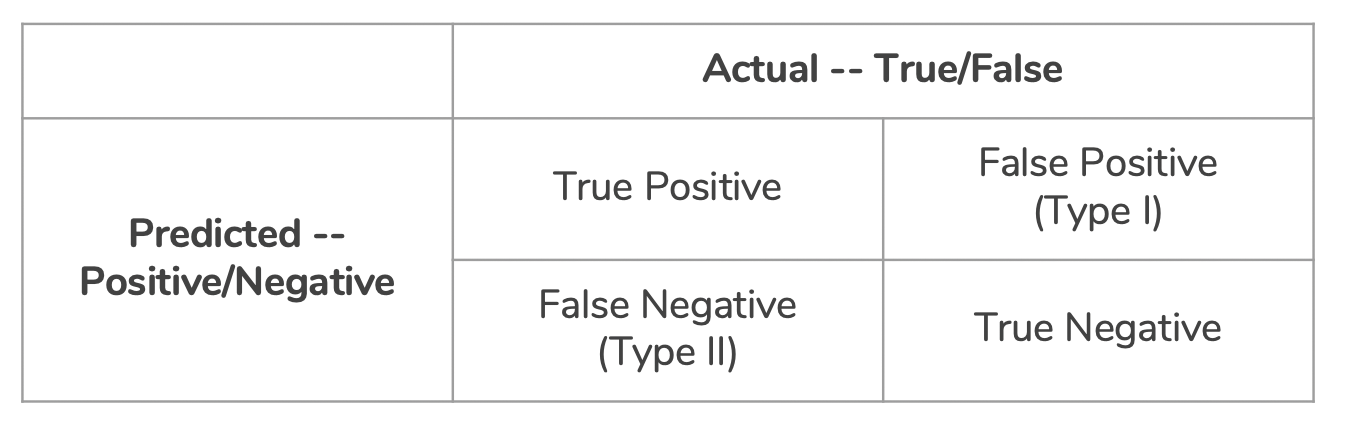

From our confusion matrix, we can calculate five different metrics measuring the validity of our model. <br>
1. Accuracy (all correct / all) = (TP + TN) / (TP + TN + FP + FN)
2. Misclassification (all incorrect / all) = 1 - Accuracy 
3. Precision (true positives / predicted positives) = TP / (TP + FP)
4. Sensitivity aka Recall (true positives / all actual positives) = TP / (TP + FN)
5. Specificity (true negatives / all actual negatives) =TN / (TN + FP)

* Sensitivity and Specificity are extremely crucial for health DS. <br>
  * <b>Sensitivity</b>: how often a test correctly generates a positive result for people who have the condition that’s being tested for. 
  * <b>Specificity</b>: how often a test correctly generates a <b>negative</b> result for people who <b>doesn't</b> have the condition that’s being tested for. <br>
<br>

* <b>Recall</b> measures the ability of a model to find all the relevant cases within a data set. For example <br>

$$ \frac{\mathrm{Spam \ emails \ correctly \ labeled \ as \ spam}}{\mathrm{Spam \ emails \ correctly \ labeled \ as \ spam} \ + {\mathrm{Spam \ emails \ incorrectly \ labeled \ as \ not \ spam}}} $$ 

<br>

* <b>Precision</b> expresses the proportion of the data points our model says existed in the relevant class that were indeed relevant. <br>

$$ \frac{\mathrm{Spam \ emails \ correctly \ labeled \ as \ spam}}{\mathrm{Spam \ emails \ correctly \ labeled \ as \ spam} \ + {\mathrm{Normal \ emails \ incorrectly \ labeled \ spam}}} $$ 
<br>

#### F1 Score
[Return to Table of Contents](#Table-of-Contents)

In some situations, we might know we want to maximize either recall or precision at the expense of the other metric. For example, in preliminary disease screening of patients for follow-up examinations, we would probably want a recall near 1.0—we want to find all patients who actually have the disease—and we can accept a low precision - we accidentally find some patients have the disease who actually don’t have it - if the cost of the follow-up examination isn’t high. However, in cases where we want to find an optimal blend of precision and recall, we can combine the two metrics using the F1 score.


* The <b>F1 score</b> is the harmonic mean of precision and recall, taking both metrics into account in the following equation:

$$ F_1 = 2 \times \frac{\mathrm{precision}\times \mathrm{recall}}{\mathrm{precision}+\mathrm{recall}} $$

#### ROC Curve
[Return to Table of Contents](#Table-of-Contents)

ROC = Receiver Operating Characteristic. <br>
- ROC is one of the most fundamental visualization techniques for showing the performance of a classification model.
- ROC shows how the recall vs. precision relationship changes <b>as we vary the threshold</b> for identifying a positive data point in our model.
- The threshold represents the value above which we consider a data point in the positive class. 

A typical ROC curve looks like this: 

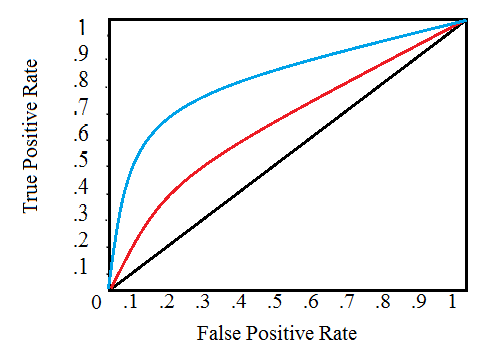

- We can quantify a model’s ROC curve by calculating the total Area Under the Curve (AUC), a metric that falls between zero and one with a higher number indicating better classification performance. 
- In the graph above, the AUC for the blue curve will be greater than that for the red curve, meaning the blue model is better at achieving a blend of precision and recall. 
- A random classifier (the black line) achieves an AUC of 0.5.

Documentation Reference:
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

#### Cross Validation
[Return to Table of Contents](#Table-of-Contents)

In cross validation the training data is divided into smaller sets. The sets are then used to calculate the parameters with the parameters then used with the testing data to calculate the performance metrics. The process is summarized in the figure below. SciKit Learn has a function to do the cross validation which is cross_val_score. Cross validation needs enough training data to be dividided in smaller sets. Cross validation is also useful to ensure that the model will work with unseen or out-of-sample data and avoid over-fitting of a model. <br> 

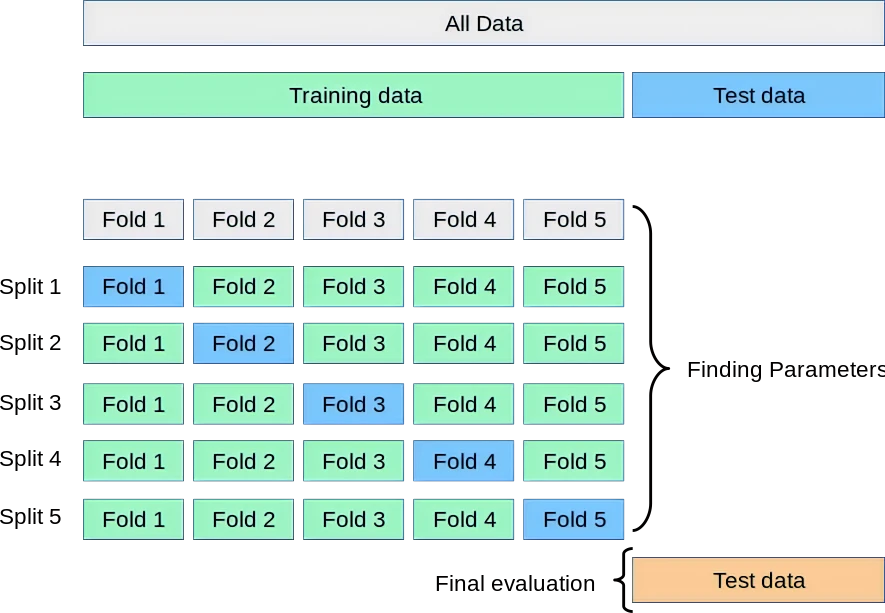

Documentation References
- https://scikit-learn.org/stable/modules/cross_validation.html

### Multi-Class and Multi-Output
More than two classes but a record belongs to only one class. For example, an email can only be HAM, SPAM or Promotions.
- https://scikit-learn.org/stable/modules/multiclass.html

### Multi-Label
Record belongs to multiple classes at the same time.
- Multi-Label Confusion Matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html#sklearn.metrics.multilabel_confusion_matrix

### Calculation of Performance Metrics of a Logistic Regression Classification
[Return to Table of Contents](#Table-of-Contents)

In [21]:
y_predict # Prediction of test data.

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [22]:
# To manually calculat the confusion matrix lets calculate how many of the predicted values are 0's and 1's.
unique, counts = np.unique(y_predict, return_counts=True)
print(unique)
print(counts)

[0 1]
[1375 1625]


In [23]:
y_test # Test data label.

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [24]:
# To manually calculate the confusion matrix lets calculate how many 
# of the test data values are 0's and 1's.
unique, counts = np.unique(y_test, return_counts=True)
print(unique)
print(counts)

[0 1]
[1431 1569]


In [25]:
# With the test data values and the predicted values data lets calculate the confusion matrix.
cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)
cm1[:,0].sum() # Adds first column of the confusion_matrix array.

Confusion Matrix : 
 [[1113  318]
 [ 262 1307]]


1375

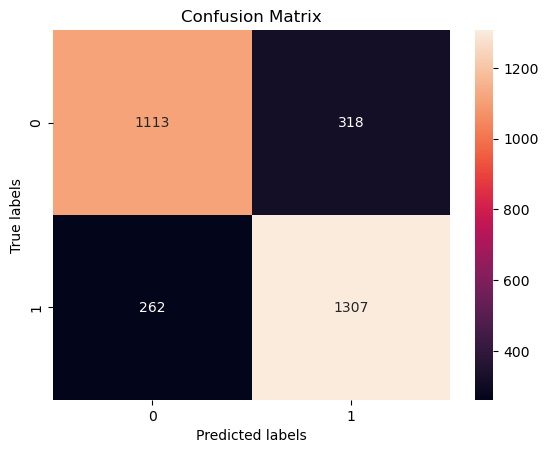

In [26]:
# Let's visualize the confusion matrix in a heatmap plot.
ax= plt.subplot()
sns.heatmap(cm1, annot=True, fmt='g', ax=ax);  # annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

<Axes: >

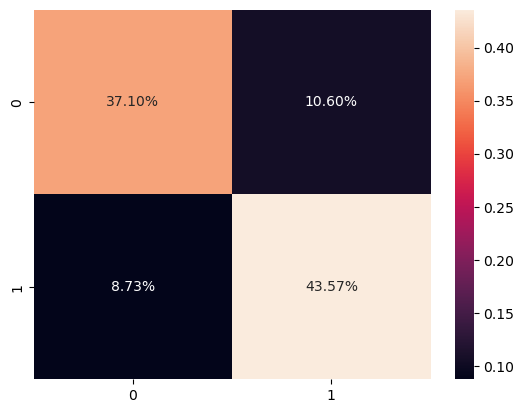

In [27]:
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='.2%') # Confusion matrix as a percentage.

<Axes: >

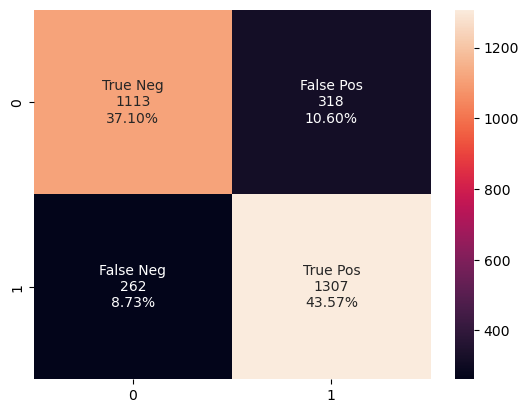

In [28]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm1.flatten()/np.sum(cm1)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm1, annot=labels, fmt='')

In [29]:
total1 = sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.8066666666666666
Sensitivity :  0.7777777777777778
Specificity :  0.8330146590184832


In [30]:
# Other ways to calculate performance metrics include using appropriate sklearn functions
# https://scikit-learn.org/stable/api/sklearn.metrics.html
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

accuracy_score(y_true = y_test, y_pred = y_predict, normalize = True)

0.8066666666666666

In [31]:
# Using the classification report
print(classification_report(y_true = y_test, y_pred = y_predict))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1431
           1       0.80      0.83      0.82      1569

    accuracy                           0.81      3000
   macro avg       0.81      0.81      0.81      3000
weighted avg       0.81      0.81      0.81      3000



In [32]:
print(logreg.coef_, logreg.intercept_) # Coefficient and intercept of the logreg model.

[[0.0322979]] [-9.40477167]


From our output we get a positive coefficient slope for the credit score. <br>
- That means that the probability of getting a loan increases as we get a higher credit score.<br>
- If we have P>|z| value higher than 0.001 and then that independent variable is significant.<br>
- Now we can put the coefficients into the estimated regression equation

In [33]:
test_x = np.array([230]) # Manually defining a value for Credit score of 230.
logreg.predict(test_x.reshape(-1, 1)) # Using the variable test_x for predicting.

array([0], dtype=int64)

In [34]:
a = logreg.intercept_ + test_x*logreg.coef_ # Predicted value of credit approval
p = np.exp(a)/(1 + np.exp(a)) # Probability of approval given the credit score.
print(p)

[[0.12171874]]


Someone with a credit score of [230] has an estimated probabilty of 12.16 % to get a loan. Note that the model will assign 1 when the probability is 0.5 or higher.

In [35]:
test_x = np.array([370]) # Defining credit score of 370 as test_x.
logreg.predict(test_x.reshape(-1, 1)) # Predicting using the test_x. 

array([1], dtype=int64)

In [36]:
a = logreg.intercept_ + test_x*logreg.coef_ # Calculating approval
p = np.exp(a)/(1 + np.exp(a)) # Calculating hte probability in the logistic regression.
print(p)

[[0.92726742]]


Someone with a credit score of 370 has an estimated probabilty of 92.72 % to get a loan.

In [37]:
#np.arange(100, 400)

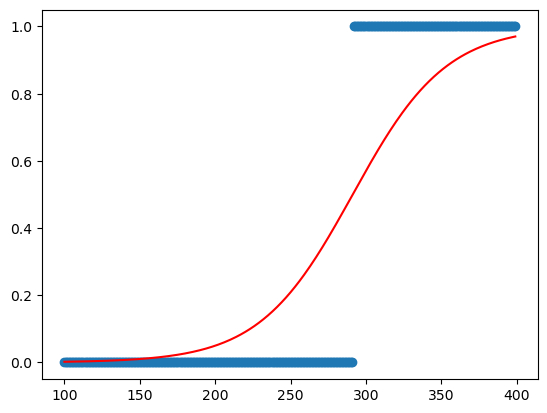

In [38]:
test_x = np.arange(100, 400) # Defining values between 100 to 400 in increments of 1.
test_y = logreg.predict(test_x.reshape(-1, 1)) # Creating the values of y for the logistic regression plot

a = logreg.intercept_ + test_x*logreg.coef_ 
p = np.exp(a)/(1 + np.exp(a))
plt.scatter(test_x,test_y) # Creating the logistic regression plot of probability vs. credit score.
plt.plot(test_x,np.squeeze(p),'r')
plt.show();
# Note that the model will assign approval once probability is 0.5 or higher. 

## Classification: Using Multiple Features
[Return to Table of Contents](#Table-of-Contents)

In this use case we don't want to predict credit approval based on one features. In our data we have historical data of approval based on several featuers (e.g., credit score, loan amount, age, marital status, etc.). We want to know the probability for someone getting a loan given the features:
    * credit_score (e.g., = 300)
    * loan_amount (e.g., = 30,000)
    * age (e.g., = 80)
    * marital (e.g., = 0)
    * health_insurance (e.g., = 0)

### Multiple Logistic Regression
[Return to Table of Contents](#Table-of-Contents)



In [39]:
dfm = pd.read_csv("./input_data/loans.csv")

In [40]:
dfm.head()

,accepted,creditscore,amount,age,marital,health_ins,creditgrade
0,0,394,96120915,38,0,1,A
1,0,400,14323452,46,1,0,A
2,0,399,63120669,64,0,0,A
3,0,379,15155047,49,0,0,A
4,0,356,79540877,55,1,0,A


In [41]:
dfm.describe()

,accepted,creditscore,amount,age,marital,health_ins
count,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,0.518600,287.329133,3.346065e+07,58.807333,0.490200,0.444467
std,0.499671,74.096185,2.887226e+07,20.860748,0.499921,0.496923
min,0.000000,100.000000,5.005890e+05,18.000000,0.000000,0.000000
25%,0.000000,246.000000,8.865364e+06,42.000000,0.000000,0.000000
50%,1.000000,299.000000,2.314822e+07,62.000000,0.000000,0.000000
75%,1.000000,345.000000,5.608367e+07,76.000000,1.000000,1.000000
max,1.000000,400.000000,9.999737e+07,90.000000,1.000000,1.000000


In [42]:
x = dfm.loc[:,['creditscore','amount','age','marital','health_ins']].values
y = dfm.loc[:,'accepted'].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
logreg = LogisticRegression(solver='lbfgs', max_iter=100) # Default values results in convergence warning. Start with chanign max_iter = 1000. 
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.864

In some cases if the this value may be very low. There may be a few things to check. like resolving the warning or normalizing the data.
Checking the confusion matrix may show the data skewed to one side which may be a sign of issues with scaling.

In [53]:
y_predict = logreg.predict(X_test)
cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[1359   72]
 [  50 1519]]


This may caused be due to the scale of the different features and their values. We may need to normalized/scale the data.

In [54]:
df = dfm.copy()
df.amount = np.log10(df.amount) # Value of Amount features was too large and needed to be normalized or scaled.
# Scaling can make significantly improve the model performance as shown in this example.
df.head()

,accepted,creditscore,amount,age,marital,health_ins,creditgrade
0,0,394,7.982818,38,0,1,A
1,0,400,7.156048,46,1,0,A
2,0,399,7.800172,64,0,0,A
3,0,379,7.180557,49,0,0,A
4,0,356,7.900590,55,1,0,A


In [55]:
df.describe()
# Note the Max/Min. 
# Accepted, Marital and Health Insurance are binary values.
# Credit score goes from 100 to 400.
# The amount in this example is scaled (see above).

,accepted,creditscore,amount,age,marital,health_ins
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.518600,287.329133,7.294472,58.807333,0.490200,0.444467
std,0.499671,74.096185,0.511020,20.860748,0.499921,0.496923
min,0.000000,100.000000,5.699481,18.000000,0.000000,0.000000
25%,0.000000,246.000000,6.947697,42.000000,0.000000,0.000000
50%,1.000000,299.000000,7.364518,62.000000,0.000000,0.000000
75%,1.000000,345.000000,7.748836,76.000000,1.000000,1.000000
max,1.000000,400.000000,7.999989,90.000000,1.000000,1.000000


In [56]:
x = df.loc[:,['creditscore','amount','age','marital','health_ins']].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9593333333333334

In [57]:
y_predict = logreg.predict(X_test)
cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
# From confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1359   72]
 [  50 1519]]
Accuracy :  0.9593333333333334
Sensitivity :  0.949685534591195
Specificity :  0.9681325685149776


This looks much better. Let's now use our model with user defined, unseen data.

In [58]:
# Using the model to predict person loan.
test_info = np.array([300,
                      np.log10(30000000),
                      80,
                      0,
                      0]) 
logreg.predict(test_info.reshape((1,5)))

array([0], dtype=int64)

It looks like this person won't get the loan  (i.e., output of 0). <br>
What was the probability of him getting the loan?

In [59]:
print(logreg.coef_, logreg.intercept_)

[[ 3.37047051e-02 -3.04536126e+00 -3.14071615e-03  2.12838828e+00
   4.63200588e+00]] [9.35255586]


In [61]:
a = logreg.coef_[0,0] * test_info[0] + logreg.coef_[0,1] * test_info[1] + logreg.coef_[0,2] * test_info[2] + logreg.coef_[0,3] * test_info[3] + logreg.coef_[0,4] * test_info[4] + logreg.intercept_
p = np.exp(a)/(1 + np.exp(a))
print(f'Probability of getting loan: {p}')

Probability of getting loan: [0.02771096]


In [68]:
a = logreg.intercept_ 
for i in range(0,5):
    a = a+logreg.coef_[0,i]*test_info[i]
p = np.exp(a)/(1 + np.exp(a))
print(p)

[0.99947474]


In [67]:
a = logreg.intercept_ 
for i in range(0,len(logreg.coef_[0])):
    a = a+logreg.coef_[0,i]*test_info[i]
p = np.exp(a)/(1 + np.exp(a))
print(p)

[0.99947474]


2.77% only. No way the person can get a loan!

Questions:
- If our dataset had a gender information and we knew there was bias towards one gender
    1. If the biased data was used in the training data will the results show this gender bias?
    2. Would it be ethical to use the data?
    3. How could we evaluate if there is bias?
        - Evaluate cases were given all other were there differences in gender.
        - Evaluate the results separate by gender and calculate metrics.
    4. How could we address?
        - Obtain a new training dataset that does not have bias.
        - Attempt to clean the data with an SME. This may be resource intensive and may include designing a method that can identify records where there is bias and ignore those records.

###  Multiple Logistic Regression: Prediction Function
[Return to Table of Contents](#Table-of-Contents)

We can use the input function to test the functionality of the classification model. This would be a demonstration of the type of questions a deployed model could ask a loan applicant.

In [73]:
crd_score = pd.to_numeric(input('Input your credit score (100-400): '))
amnt_requested = pd.to_numeric(input('What amount of loan would you like (Positive value, no commas): '))
your_age = pd.to_numeric(input('What is your age (18-150): '))
mart_status = pd.to_numeric(input('Marital Status (0 or 1): '))
hlth_insurance = pd.to_numeric(input('Health Insurance (0 or 1): '))

# Conditional statements. Will only enter the prediction model if the format for input is correct.
# Otherwise will print that input the data in correct format.
if(((100 <= crd_score) and (crd_score <= 400)) and # Credit score can only be between 100 and 400.
    (amnt_requested > 0) and # Amount requested can only be positive else there is an error.
    ((18 <= your_age) and (your_age <= 150)) and # Age can only be greater than 18 or less than 130 for sure .
    ((mart_status == 0) or (mart_status == 1)) and # Marital status has to be 1 or 0
    ((hlth_insurance == 0) or (hlth_insurance == 1))): # Health insurance has to be 1 or 0
        
    test_info = np.array([crd_score,
                          np.log10(int(amnt_requested)), # Recall we scaled the amount requested.
                          your_age,
                          mart_status,
                          hlth_insurance]) 
        
    # Using the model to predict loan approval with person details.
    logreg.predict(test_info.reshape((1,5)))

    # To calcualte the probability
    a = logreg.intercept_ 
    for i in range(0,len(logreg.coef_[0])):
        a = a+logreg.coef_[0,i]*test_info[i]
    p = np.exp(a)/(1 + np.exp(a))
    
    if logreg.predict(test_info.reshape((1,5)))[0] == 0:
        print(f'Sorry no loan for you.')
    if logreg.predict(test_info.reshape((1,5)))[0] == 1:
        print(f'Congratulations you will get a loan.')

    print(f'Probability of getting loan is: {round(p[0])}.')

else:
    # If there are errors in the input data it will print this messge.
    print('Please fix the input or format error(s).')

Input your credit score (100-400):  300
What amount of loan would you like (Positive value, no commas):  10000000
What is your age (18-150):  18
Marital Status (0 or 1):  0
Health Insurance (0 or 1):  0


Sorry no loan for you.
Probability of getting loan is: 0.


###  Other Machine Learning Algorithms
[Return to Table of Contents](#Table-of-Contents)

Note that defining the model (or algorithms) is the same if not very similar and typically involves the following steps:
- Defining values of the independent variable or variables (x)
- Defining values of the dependent variable or variable to be predicted (y)
- Scaling/normalization if needed
- Train/Test Split (Typically 80/20)
- Fitting the training data to the model
- Calculate predictions using the testing data
- Calculating metrics, predicting, using the model, etc.
- Deploy and use the model. 

In [74]:
df = dfm.copy()
df.amount = np.log10(df.amount)
df.head()

,accepted,creditscore,amount,age,marital,health_ins,creditgrade
0,0,394,7.982818,38,0,1,A
1,0,400,7.156048,46,1,0,A
2,0,399,7.800172,64,0,0,A
3,0,379,7.180557,49,0,0,A
4,0,356,7.900590,55,1,0,A


In [75]:
x = df.loc[:,['creditscore','amount','age','marital','health_ins']].values
y = df.loc[:,'accepted'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### Perceptron
[Return to Table of Contents](#Table-of-Contents)

Documentation References:
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
- https://scikit-learn.org/stable/modules/linear_model.html#perceptron

In [76]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
#clf.score(X_test, y_test)
y_predict = clf.predict(X_test)

cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))
#clf.score(X_test, y_test) # Accuracy from the .score function.
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1361   70]
 [  67 1502]]
Accuracy :  0.9543333333333334
Sensitivity :  0.9510831586303284
Specificity :  0.9572976418100702


### SGD Classifier
[Return to Table of Contents](#Table-of-Contents)

Documentation References:
- Regularized linear models with stochastic gradient descent (SGD) learning.
    - https://scikit-learn.org/stable/modules/sgd.html#sgd
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [77]:
clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))
#clf.score(X_test, y_test) # Accuracy from the .score function.
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1361   70]
 [  20 1549]]
Accuracy :  0.97
Sensitivity :  0.9510831586303284
Specificity :  0.9872530274059911


### SVM
[Return to Table of Contents](#Table-of-Contents)


Documentation References:
- https://scikit-learn.org/stable/modules/svm.html  

In [78]:
clf = svm.SVC()
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

cm1 = confusion_matrix(y_test, y_predict)
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))
#neigh.score(X_test, y_test) # Accuracy from the .score function.
#####from confusion matrix calculate accuracy
accuracy1 = (cm1[0,0] + cm1[1,1]) / total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0] / (cm1[0,0] + cm1[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm1[1,1] / (cm1[1,0] + cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1115  316]
 [ 231 1338]]
Accuracy :  0.8176666666666667
Sensitivity :  0.7791754018169113
Specificity :  0.8527724665391969


### Random Forest
[Return to Table of Contents](#Table-of-Contents)


Documentation References:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [79]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

cm1 = confusion_matrix(y_test, y_predict)
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))
#neigh.score(X_test, y_test) # Accuracy from the .score function.
#####from confusion matrix calculate accuracy
accuracy1 = (cm1[0,0] + cm1[1,1]) / total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0] / (cm1[0,0] + cm1[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm1[1,1] / (cm1[1,0] + cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1365   66]
 [   0 1569]]
Accuracy :  0.978
Sensitivity :  0.9538784067085954
Specificity :  1.0


### k-Nearest Neighbors
[Return to Table of Contents](#Table-of-Contents)

Documentation References:
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://scikit-learn.org/stable/modules/neighbors.html#classification

In [80]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)

cm1 = confusion_matrix(y_test, y_predict)
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))
#neigh.score(X_test, y_test) # Accuracy from the .score function.
#####from confusion matrix calculate accuracy
accuracy1 = (cm1[0,0] + cm1[1,1]) / total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0] / (cm1[0,0] + cm1[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm1[1,1] / (cm1[1,0] + cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1337   94]
 [ 237 1332]]
Accuracy :  0.8896666666666667
Sensitivity :  0.9343116701607268
Specificity :  0.8489483747609943


### Artificial Neural Network
[Return to Table of Contents](#Table-of-Contents)

Documentation References:
- Tensorflow Sequential Sequential Model: https://www.tensorflow.org/guide/keras/sequential_model
- Scikit Learn Neural Networks: https://scikit-learn.org/stable/modules/neural_networks_supervised.html

#### Artificial Neural Network (One Layer)

In [81]:
number_of_classes = 1
number_of_features = 5
model = Sequential()
model.add(Dense(number_of_classes, activation = 'sigmoid', input_dim = number_of_features))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))

C:\Users\felix\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20 (84.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14 (60.00 B)

In [83]:
y_predict = model.predict(X_test)
y_predict[y_predict>=0.5] = 1
y_predict[y_predict<0.5] = 0

cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
Confusion Matrix : 
 [[1363   68]
 [  45 1524]]
Accuracy :  0.9623333333333334
Sensitivity :  0.9524807826694619
Specificity :  0.97131931166348


#### Artificial Neural Network (Three Layers)

In [84]:
input_layer = Input(shape=(X_train.shape[1],))
dense_layer_1 = Dense(6, activation='sigmoid')(input_layer)
dense_layer_2 = Dense(6, activation='sigmoid')(dense_layer_1)
output = Dense(1, activation='sigmoid')(dense_layer_2)

In [85]:
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy')
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85 (340.00 B)

 Trainable params: 85 (340.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [86]:
layer = Normalization(axis=-1)
layer.adapt(X_train)
X_train_n = layer(X_train)
X_test_n = layer(X_test)

In [87]:
history = model.fit(X_train_n, y_train, epochs=50, verbose=0, validation_data=(X_test_n, y_test))

y_predict = model.predict(X_test_n)
y_predict[y_predict>=0.5] = 1
y_predict[y_predict<0.5] = 0

cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step
Confusion Matrix : 
 [[1392   39]
 [   9 1560]]
Accuracy :  0.984
Sensitivity :  0.9727463312368972
Specificity :  0.994263862332696


# Notebook End